In [3]:
# importing all necessary Libraries

import matplotlib.pyplot as plt
# Image related operations
import matplotlib.image as mpimg 
import numpy as np
import cv2 # opencv lib

In [4]:
# Loading the image of the car
img_path="/content/car1.jpeg"

In [5]:
# Matplotlib library has function mpimg to read the image

car1 = mpimg.imread(img_path)

In [6]:
# Car has the shape of 168*300 pixels and since it is an RGB image hence 3 channels
# 168 * 300 * 3

car1.shape

(168, 300, 3)

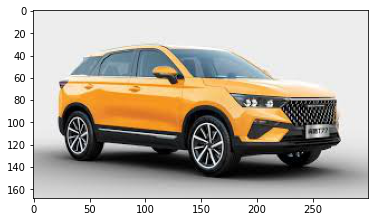

In [7]:
# Showing the car which was read by matplotlib

plt.imshow(car1)

In [8]:
# Library CV2 has function imread to read the image
car1_cv2 = cv2.imread(img_path)

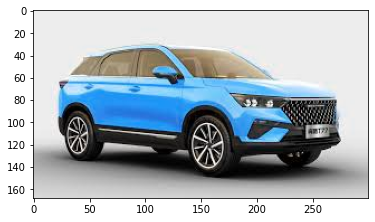

In [9]:
# cv2 reads images as BGR and in matplotlib reads as RGB
plt.imshow(car1_cv2) 

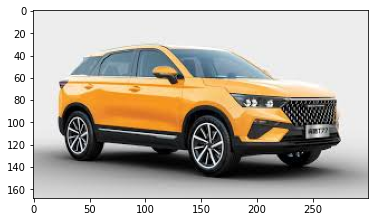

In [10]:
# Converting car1_cv2 from RGB to BGR

car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

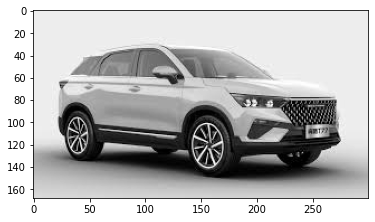

In [11]:
# Converting car from RGB to Grayscale

car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

**Creating a function to print image**

In [46]:
# Creating function to read image, bydefault gray color image will be printed

def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="gray")
    return img
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  return img

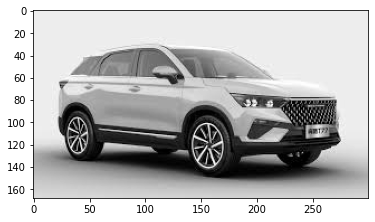

In [44]:
#greyscale image gets printed by default by calling the function
car = read_img(img_path)

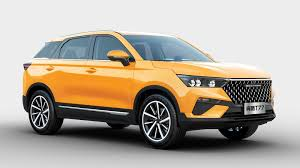

In [47]:
# Printing color image using the same function
color_car = read_img(img_path, grayscale=False)

**Understanding composition of Colored Images**

In [12]:

# Creating a function which dissect an existing RGB image into 3 separate images of color RED, GREEN and BLUE

def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)
  print(f"B: {B}")
  print(f"G: {G}")
  print(f"R: {R}")

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

B: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]
G: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]
R: [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [216 216 216 ... 211 211 211]
 [217 217 217 ... 213 213 213]
 [217 217 217 ... 214 214 214]]


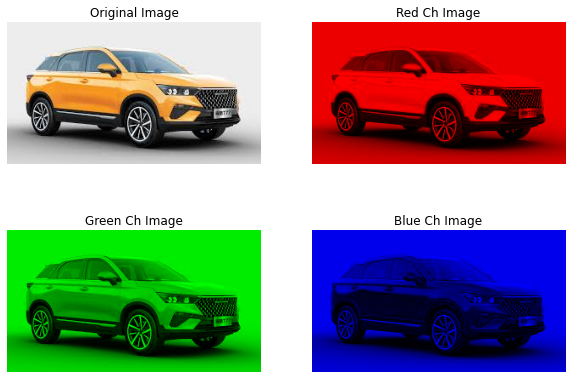

In [13]:
# calling function visualize_RGB_channel by passing car1_cv2 as parameter

viusalize_RGB_channel(imgArray=car1_cv2)

In [14]:
# In order to test our function we can test with random created color array image

random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img

array([[[ 50, 178, 238],
        [ 46, 168, 220],
        [165, 134, 182],
        [ 76, 100, 207],
        [213, 177,  53],
        [ 69, 115,  19]],

       [[  4,   7,  26],
        [ 38,  50, 179],
        [119, 142, 138],
        [ 96, 212, 238],
        [ 78,  11,  44],
        [110, 100, 245]],

       [[201,  92,  49],
        [123,  72,  87],
        [ 43,  77, 192],
        [157, 202,  77],
        [195,  78,  16],
        [102,  98, 171]],

       [[123, 142, 187],
        [ 90,  21, 222],
        [185,  13,  74],
        [ 12, 210,  19],
        [173, 144,  82],
        [ 46, 205, 116]],

       [[ 99, 213, 120],
        [ 41, 254, 237],
        [193, 150, 248],
        [166, 193,  81],
        [ 24,  92, 175],
        [215, 222, 137]],

       [[114,   0, 245],
        [228, 112, 131],
        [ 33,  97,  35],
        [127, 226, 189],
        [178, 110, 247],
        [ 54, 226,  85]]])

B: [[ 50  46 165  76 213  69]
 [  4  38 119  96  78 110]
 [201 123  43 157 195 102]
 [123  90 185  12 173  46]
 [ 99  41 193 166  24 215]
 [114 228  33 127 178  54]]
G: [[178 168 134 100 177 115]
 [  7  50 142 212  11 100]
 [ 92  72  77 202  78  98]
 [142  21  13 210 144 205]
 [213 254 150 193  92 222]
 [  0 112  97 226 110 226]]
R: [[238 220 182 207  53  19]
 [ 26 179 138 238  44 245]
 [ 49  87 192  77  16 171]
 [187 222  74  19  82 116]
 [120 237 248  81 175 137]
 [245 131  35 189 247  85]]


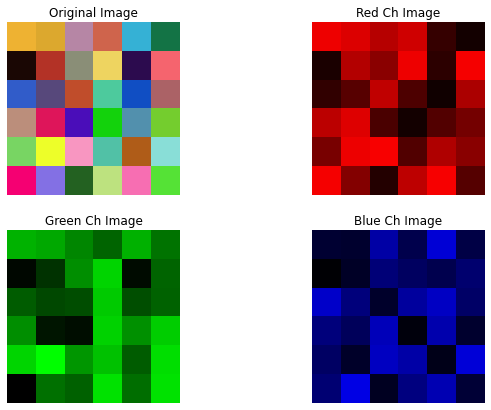

In [15]:
# call Visualize_RGB_ channel function with random_colored_image 
viusalize_RGB_channel(imgArray=random_colored_img)

**Understanding Filters**


**Sobel filter** is used for edge detection. 

*   It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.
*   The result shows how abruptly or smoothly the image changes at each
pixel, and therefore how likely it is that that pixel represents an edge.



In [16]:
# Creating SOBEL filter 

sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

In [17]:
print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [18]:
print("highlighting Horizontal edges:\n", sobel.T)

highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


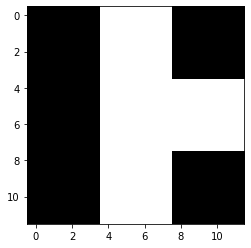

In [19]:
# Lets try testing filter with our 12 * 12 matrix data

example = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]
example1 = np.array(example)
plt.imshow(example1, cmap="gray")

**Convulation Function**

In [20]:
# Convulation function

def simple_conv(imgFilter=None, picture=None):
  
  # extract the shape of the image
  p_row, p_col = picture.shape

  # shape of the filter is k =3
  k = imgFilter.shape[0] 

  temp = list()

#stride/jump of the filter is defaulted to 1
  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):

    # take horizontal right stride across col by col
    for h_stride in range(final_cols):

      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  
  return resulant_image

In [21]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

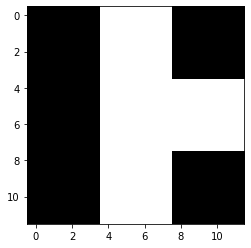

In [22]:
# image before the filter is applied

plt.imshow(example1, cmap="gray")

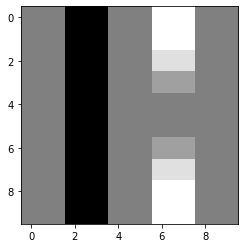

In [23]:
# image After the filter is applied

plt.imshow(result, cmap="gray")

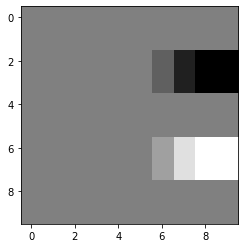

In [24]:
# Applying horizontal Filter

result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

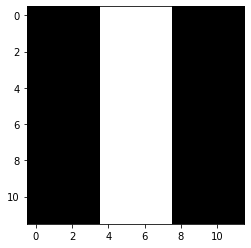

In [25]:
# Lets test the convulation function with sample example2

example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

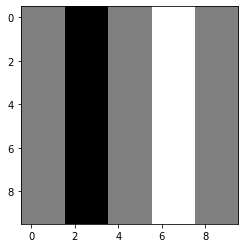

In [26]:
# After calling simple convolution function and passing example2 

result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

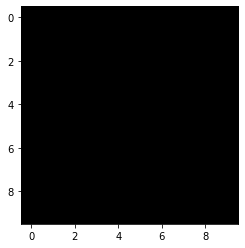

In [27]:
# After calling simple convolution function and passing example2 using Horizontal filter

result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

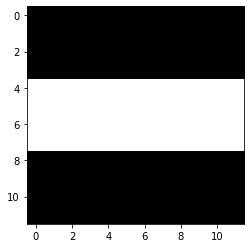

In [28]:
# Transposing example 2 to example2_T

example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

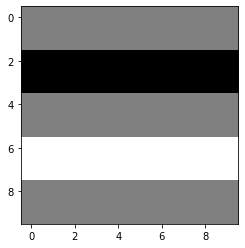

In [29]:
# After calling simple convolution function and passing example2.T using Horizontal filter

result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

**Testing Convulation by passing Grayscale Car Image**

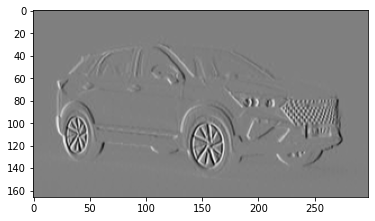

In [30]:
# Passing Gray Scale Image of Car through simple convolution function

result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

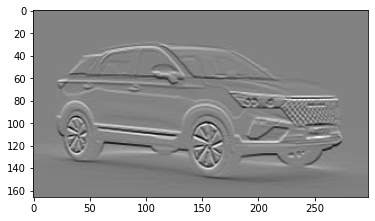

In [31]:
# Passing Gray Scale Image of Car through simple convolution function using horizontal filter

result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

Instead of **Sobel Filter**, create a random filter and test the car image

In [32]:
# Creating random filer

random_f = np.random.randn(3,3)
random_f

array([[-0.61462496, -0.36871951,  0.97559067],
       [-0.29125968,  1.57937731, -0.54668437],
       [-0.35254531, -0.97019389, -1.77087933]])

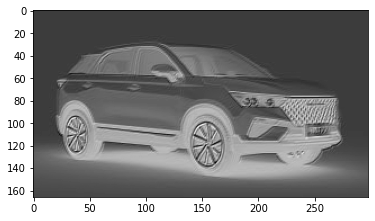

In [33]:
# Passing Car images throuh convulation using random filter

result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [42]:
import tensorflow as tf


In [35]:

# (1,r,c,1)
row,col = car1_cv2_BGR_GRAY.shape
car = car1_cv2_BGR_GRAY.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [36]:

CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [37]:
# predicting the car

out = conv_model.predict(car)

1/1 [==============================] - 0s 390ms/step


In [38]:

out.shape

(1, 166, 298, 1)

In [39]:
row, col = out.shape[1:-1]

In [40]:
reshape_out = out.reshape(row, col)

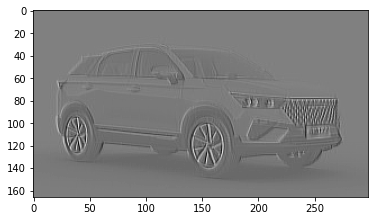

In [41]:
plt.imshow(reshape_out, cmap="gray")